<a href="https://colab.research.google.com/github/Shinu87/MACHINE_LEARNING/blob/main/WINEPREDICTION(KNN%20from%20scratch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/content/drive/MyDrive/INTERNSHIP/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [4]:
df = df.drop(['Id'], axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df.shape

(1143, 12)

In [7]:
duplicate = df[df.duplicated()]
duplicate.count()

fixed acidity           125
volatile acidity        125
citric acid             125
residual sugar          125
chlorides               125
free sulfur dioxide     125
total sulfur dioxide    125
density                 125
pH                      125
sulphates               125
alcohol                 125
quality                 125
dtype: int64

In [8]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<Axes: xlabel='quality'>

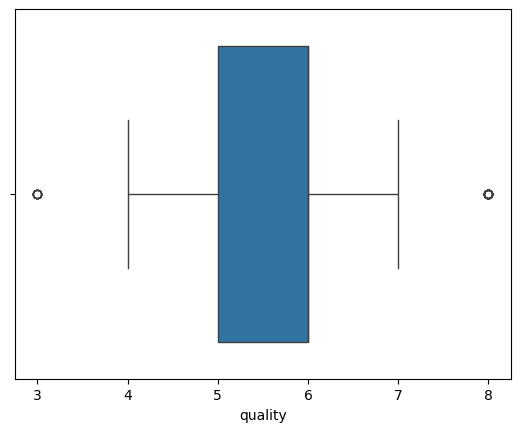

In [9]:
sns.boxplot(x=df['quality'])

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            2.000000
volatile acidity         0.247500
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002275
pH                       0.195000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [11]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
df = df[~((df < lower_limit) | (df > upper_limit)).any(axis=1)]
df.shape

(834, 12)

<Axes: xlabel='quality'>

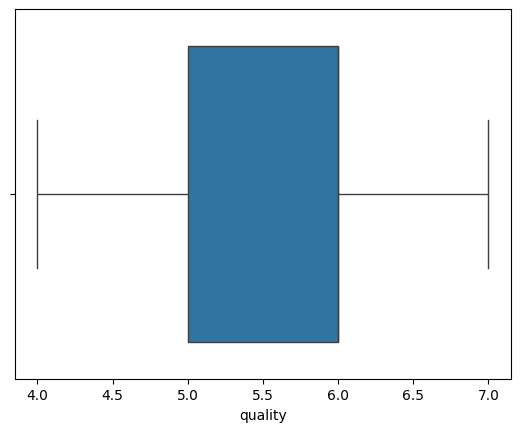

In [12]:
sns.boxplot(x=df['quality'])

<Axes: >

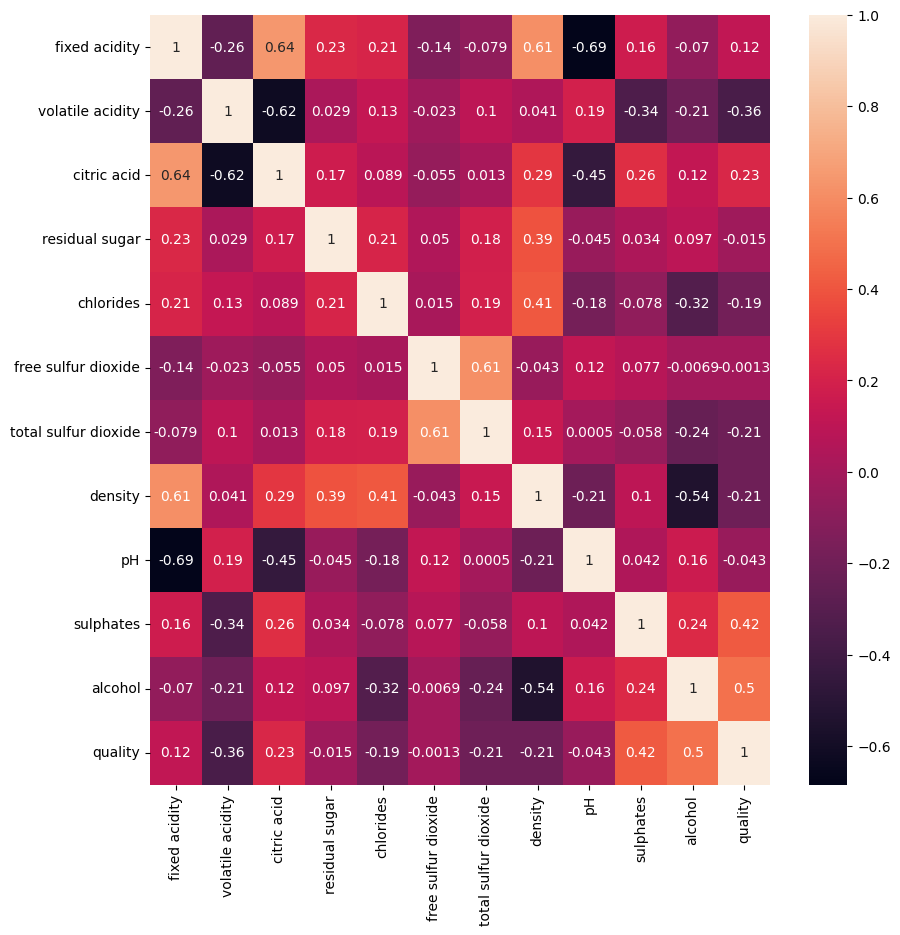

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [15]:
X = df[['sulphates']].values
y = df['quality'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


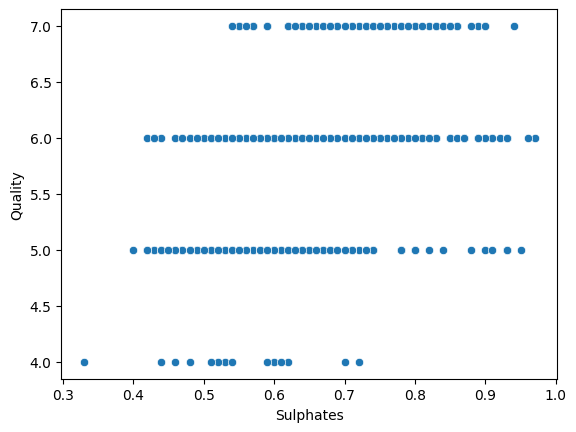

In [16]:
sns.scatterplot(x=X_train.flatten(), y=y_train)
plt.xlabel('Sulphates')
plt.ylabel('Quality')
plt.show()

In [17]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [18]:
def predict_knn(x_train, y_train, x_test, k):
    y_pred = []
    for i in range(len(x_test)):
        distances = []
        for j in range(len(x_train)):
            d = distance(x_test[i], x_train[j])
            distances.append((d, y_train[j]))
        distances = sorted(distances)
        neighbors = distances[:k]

        sum_values = 0.0
        for neighbor in neighbors:
            sum_values += neighbor[1]
        mean_value = sum_values / k

        y_pred.append(mean_value)

    return np.array(y_pred)


In [19]:
k = 5
y_pred = predict_knn(X_train, y_train, X_test, k)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 0.73


In [20]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")


R² Score: -0.52


In [21]:
y_pred_random = predict_knn(X_train, y_train, np.array([[0.68]]), k)
print(y_pred_random)

[5.]


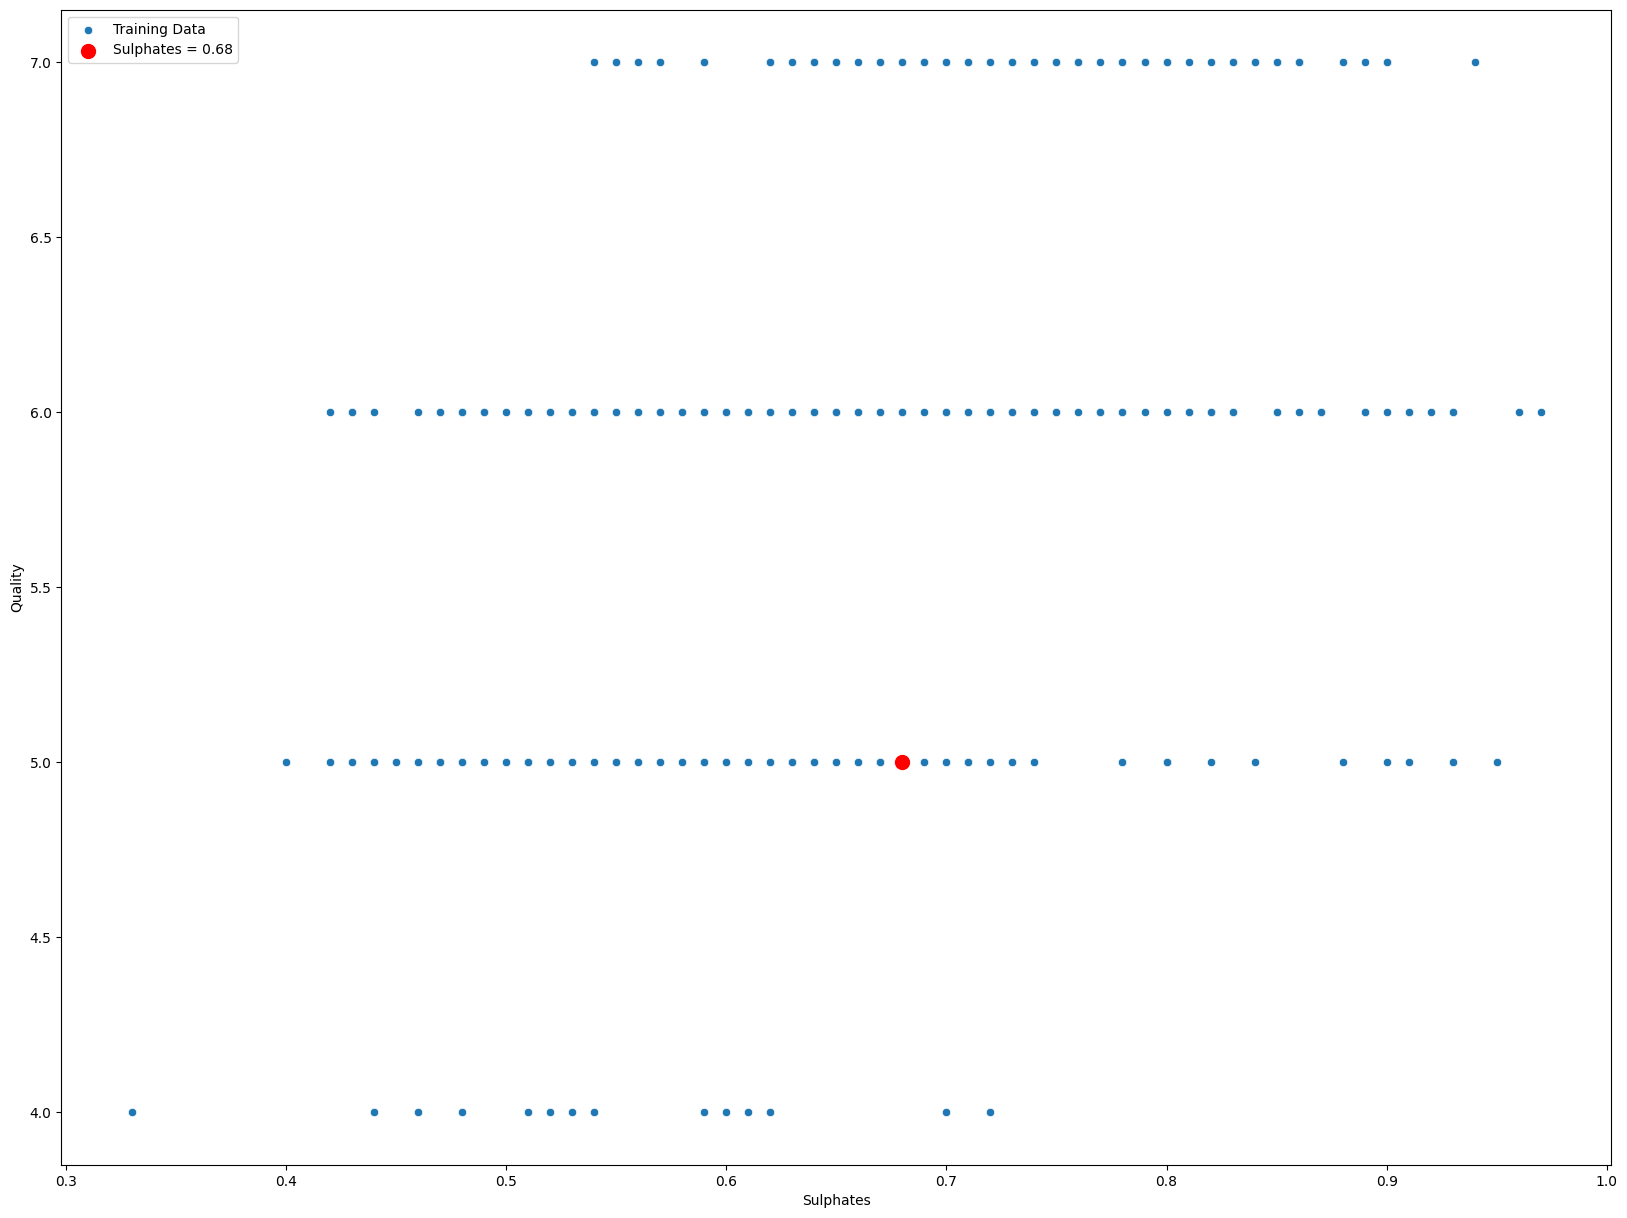

In [23]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Training Data')
plt.scatter(0.68, y_pred_random, color='red', marker='o', s=100, label='Sulphates = 0.68')
plt.legend()
plt.xlabel('Sulphates')
plt.ylabel('Quality')
plt.show()